In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [22]:
# Maxi Mots Croisés
mmc = pd.DataFrame({"winnings": [0, 5, 10, 15, 20, 50, 200, 1_000, 10_000, 250_000],
                      "tickets": [np.nan, 450_000, 517_520, 45_000, 111_990, 60_000, 9_000, 60, 5, 2]})
mmc

,winnings,tickets
0,0,NaN
1,5,450000.0
2,10,517520.0
3,15,45000.0
4,20,111990.0
5,50,60000.0
6,200,9000.0
7,1000,60.0
8,10000,5.0
9,250000,2.0


In [23]:
ticket_price = 5
mmc.insert(1, "net_winnings", mmc.winnings - ticket_price)
mmc


,winnings,net_winnings,tickets
0,0,-5,NaN
1,5,0,450000.0
2,10,5,517520.0
3,15,10,45000.0
4,20,15,111990.0
5,50,45,60000.0
6,200,195,9000.0
7,1000,995,60.0
8,10000,9995,5.0
9,250000,249995,2.0


In [24]:
total_tickets = 4_500_000
winning_tickets = int(mmc.tickets.sum())
winning_tickets

mmc.loc[0, "tickets"] = total_tickets - winning_tickets
mmc.tickets = mmc['tickets'].astype('int')

mmc["ticket_percentage"] = mmc.tickets / total_tickets * 100
mmc

,winnings,net_winnings,tickets,ticket_percentage
0,0,-5,3306423,73.476067
1,5,0,450000,10.000000
2,10,5,517520,11.500444
3,15,10,45000,1.000000
4,20,15,111990,2.488667
5,50,45,60000,1.333333
6,200,195,9000,0.200000
7,1000,995,60,0.001333
8,10000,9995,5,0.000111
9,250000,249995,2,0.000044


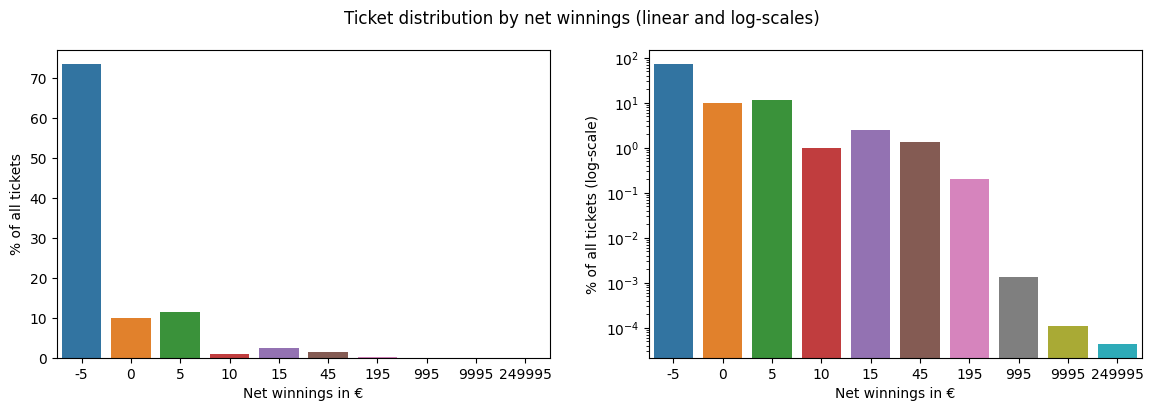

In [25]:
plt.figure(figsize=(14, 4))

ax1 = plt.subplot(1, 2, 1)
sns.barplot(data=mmc, x="net_winnings", y="ticket_percentage")
ax1.set_xlabel("Net winnings in €")
ax1.set_ylabel("% of all tickets")

ax2 = plt.subplot(1, 2, 2)
sns.barplot(data=mmc, x="net_winnings", y="ticket_percentage")
ax2.set_xlabel("Net winnings in €")
ax2.set_ylabel("% of all tickets (log-scale)")
ax2.set_yscale("log")

plt.suptitle("Ticket distribution by net winnings (linear and log-scales)")
plt.show()

In [26]:
mmc["total_net_winnings"] = mmc.net_winnings * mmc.tickets
mmc

,winnings,net_winnings,tickets,ticket_percentage,total_net_winnings
0,0,-5,3306423,73.476067,-16532115
1,5,0,450000,10.000000,0
2,10,5,517520,11.500444,2587600
3,15,10,45000,1.000000,450000
4,20,15,111990,2.488667,1679850
5,50,45,60000,1.333333,2700000
6,200,195,9000,0.200000,1755000
7,1000,995,60,0.001333,59700
8,10000,9995,5,0.000111,49975
9,250000,249995,2,0.000044,499990


In [27]:
mmc[["tickets", "ticket_percentage", "total_net_winnings"]].sum().astype('int')

tickets               4500000
ticket_percentage         100
total_net_winnings   -6750000
dtype: int64

In [28]:
average_ticket_net_winnings = mmc["total_net_winnings"].sum() / total_tickets
percentage = -average_ticket_net_winnings / ticket_price
print(average_ticket_net_winnings, f"€, soit {percentage:.2%} du prix du ticket est perdu en moyenne")

-1.5 soit 30.00% du prix du ticket part à la FDJ


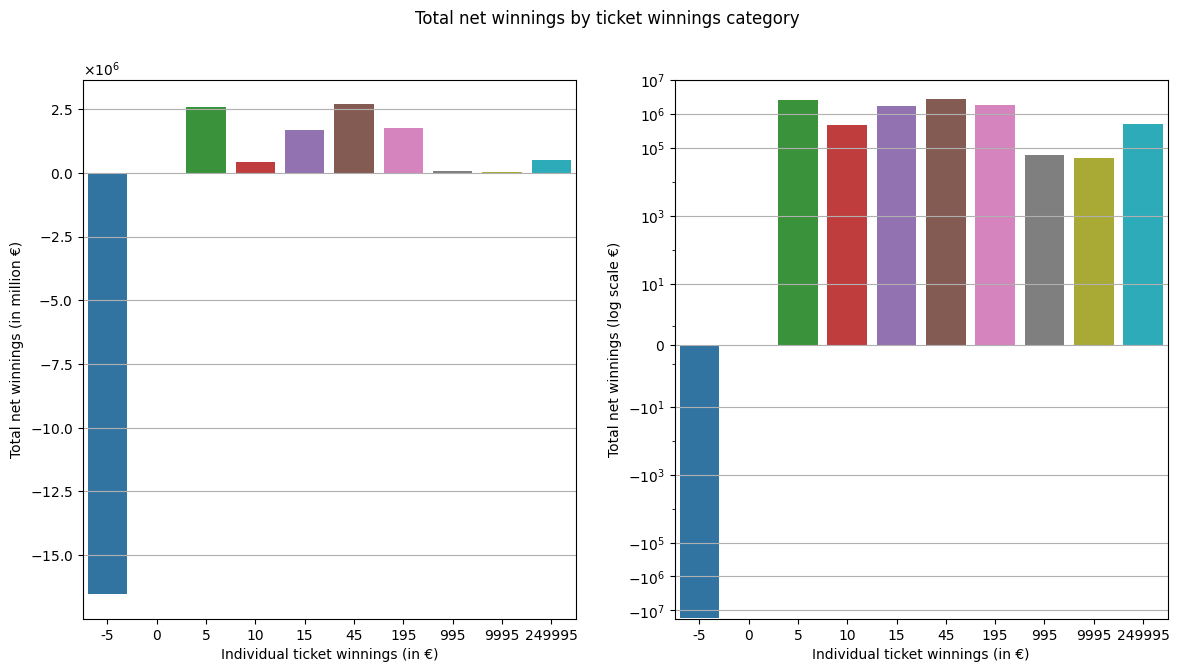

In [29]:
from matplotlib.ticker import ScalarFormatter

plt.figure(figsize=(14, 7))
plt.suptitle("Total net winnings by ticket winnings category")

ax1 = plt.subplot(1, 2, 1)
sns.barplot(data=mmc, x="net_winnings", y="total_net_winnings")
plt.xlabel("Individual ticket winnings (in €)")
plt.ylabel("Total net winnings (in million €)")

formatter = ScalarFormatter(useMathText=True)
formatter.set_scientific(True)
formatter.set_powerlimits((6, 6))
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid(True, axis="y")

ax2 = plt.subplot(1, 2, 2)
sns.barplot(data=mmc, x="net_winnings", y="total_net_winnings")
plt.xlabel("Individual ticket winnings (in €)")
plt.ylabel("Total net winnings (log scale €)")
plt.yscale("symlog")
plt.yticks([-10000000, -1000000, -100000, -1000, -10, 0, 10, 1000, 100000, 1000000, 10000000])
plt.grid(True, axis="y")

plt.show()
